## KDE 그래프를 그리고 저장하는 코드.

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import product
from scipy import stats

In [11]:
# # csv 파일 경로 지정 및 kde 그래프 저장할 경로 지정.
# csv_path = "./meat_dataset/deeplant_SKU_ex.csv" # 여기 지정 1 
# save_path = "./meat_dataset/ku_KDE" # 여기 지정 2
# df = pd.read_csv(csv_path)

In [58]:
def grade_to_number(grade):
    grade_map = {'등심1++': 111, '등심1+': 11, '등심1': 1, '등심2':2, '등심3': 3}
    return grade_map.get(grade, 0)  # 매핑되지 않는 등급은 0으로 처리

# csv 파일 경로 지정 및 kde 그래프 저장할 경로 지정.
csv_path = "../dataset/default_1213_fixed.csv"
save_path = "../dataset/ku_kde_norm_1213"

# grade 열을 숫자로 변환하면서 CSV 파일 읽기
df = pd.read_csv(csv_path, converters={'grade': grade_to_number})

In [59]:

criterion_column = ['grade'] # 세부 분류 기준 column. -> 여기 지정 3
target_columns = ['Marbling','Color','Texture','Surface_Moisture','Total'] # 주요 분류 기준 column. -> 여기 지정 4

# ex 등급 별 마블링 kde 그래프
# criterion_column = ['grade']
# target_columns = ['Marbling']

In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

def _no_criterion(df, target_columns, save_path='./Deeplant-AI/Deeplant-AI-main/dataset/kde_graph_1211'):
    for t in target_columns:
        fig = plt.figure(figsize=(10,10))
        sns.kdeplot(df[t], bw='1', shade=True)
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.title(f'Density Plot of {t}')
        fig.savefig(os.path.join(save_path, f'kde_{t}.png'))
        plt.show()
        plt.clf()

def _criterion(df, criterion_column, target_columns, save_path='./Deeplant-AI/Deeplant-AI-main/dataset/kde_graph_1211'):
    unique_values = df[criterion_column[0]].unique()
    target = target_columns

    for t in target:
        fig, axs = plt.subplots(1, 5, figsize=(25, 5))  # 1행 5열의 서브플롯 생성
        fig.suptitle(f'Density Plot of {t} for Different Grades', fontsize=16)
        
        for idx, value in enumerate(unique_values):
            
            c_df = df[df[criterion_column[0]] == value]
            
            data = c_df[t].dropna()
            kde = stats.gaussian_kde(data)
            x_range = np.linspace(data.min(), data.max(), 100)
            y_kde = kde(x_range)
            
            # 개별 서브플롯 저장
            individual_fig, ax = plt.subplots(figsize=(5, 5))
            ax.plot(x_range, y_kde)
            ax.fill_between(x_range, y_kde, alpha=0.5)
            ax.set_xlabel('Value')
            ax.set_ylabel('Density')
            
            if value == 111:
                grade_label = '1++'
            elif value == 11:
                grade_label = '1+'
            else:
                grade_label = str(value)
            
            ax.set_title(f'Grade {grade_label}')
            
            individual_fig.savefig(os.path.join(save_path, f'kde_{t}_{grade_label}_grade.png'))
            plt.close(individual_fig)
            
            # 서브플롯을 전체 그래프에 추가
            axs[idx].plot(x_range, y_kde)
            axs[idx].fill_between(x_range, y_kde, alpha=0.5)
            axs[idx].set_xlabel('Value')
            axs[idx].set_ylabel('Density')
            axs[idx].set_title(f'Grade {grade_label}')
        
        # 빈 서브플롯 제거
        if len(unique_values) < 5:
            for i in range(len(unique_values), 5):
                fig.delaxes(axs[i])
        
        plt.tight_layout()
        plt.show()
        plt.close(fig)

def drawKDE(df, criterion_column, target_columns, save_path='./Deeplant-AI/Deeplant-AI-main/dataset/kde_graph_1211'):
    if criterion_column is None:
        _no_criterion(df, target_columns, save_path)
    else:
        _criterion(df, criterion_column, target_columns, save_path)


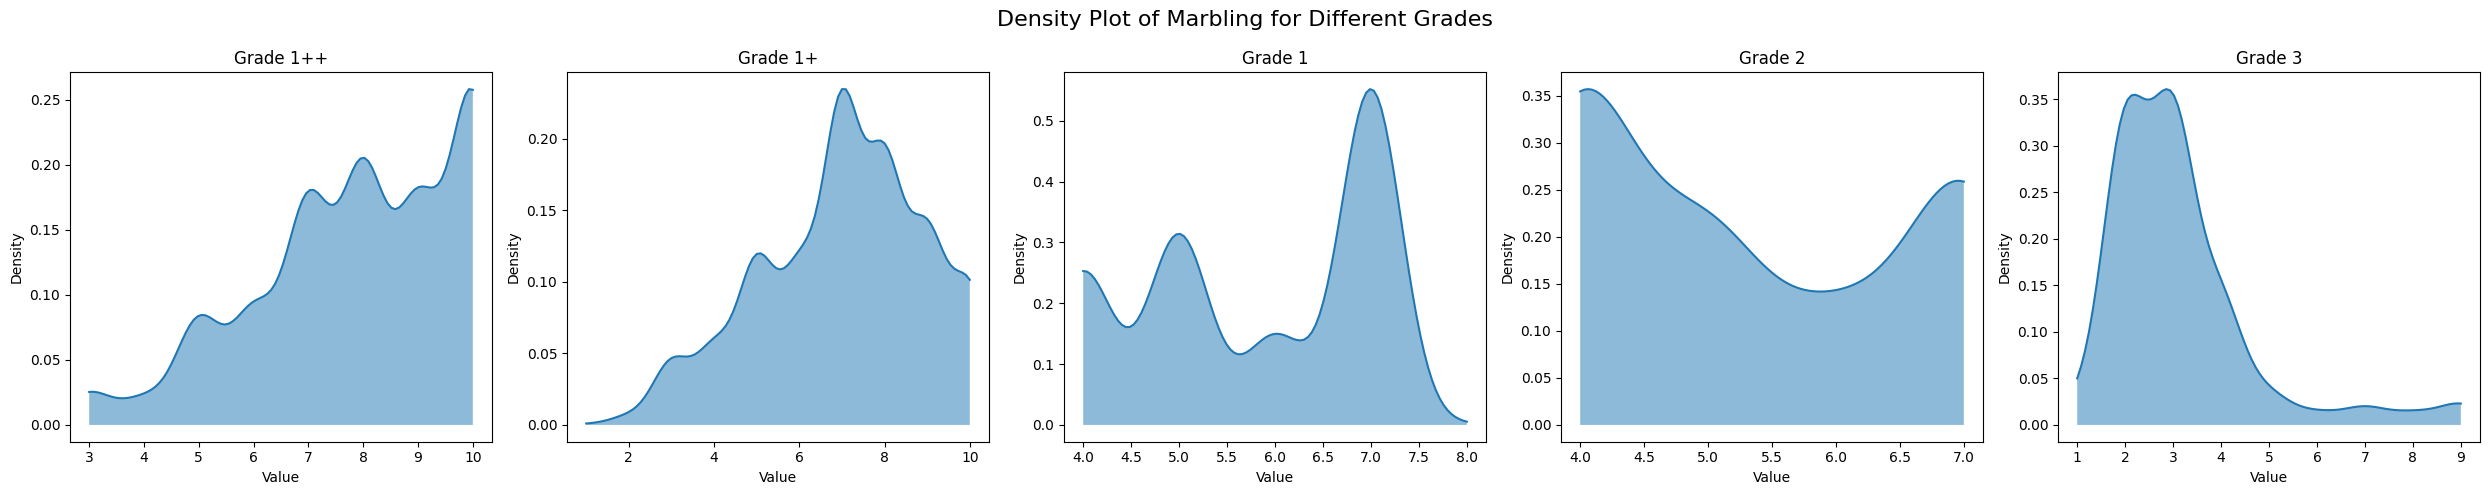

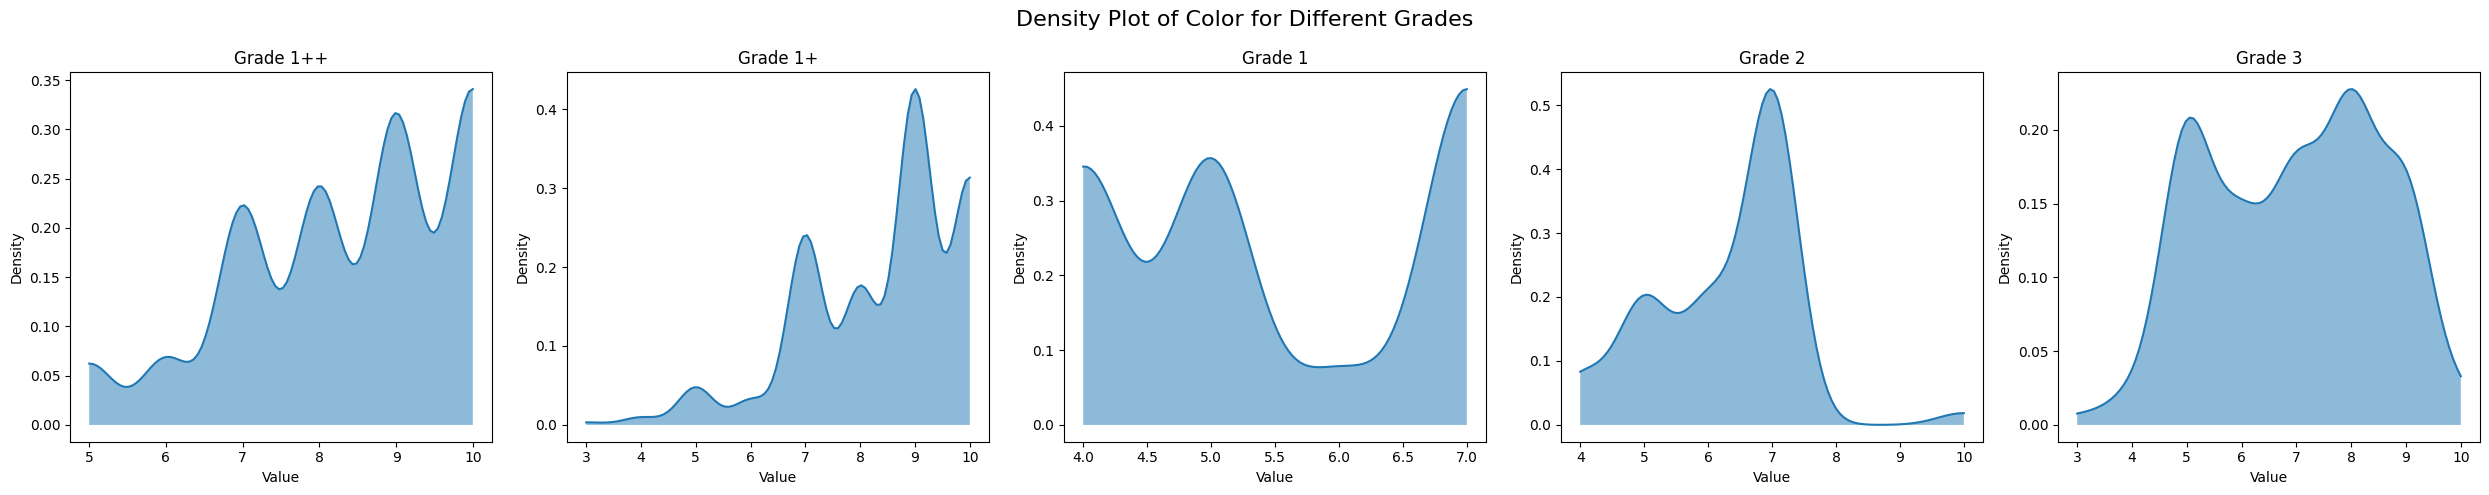

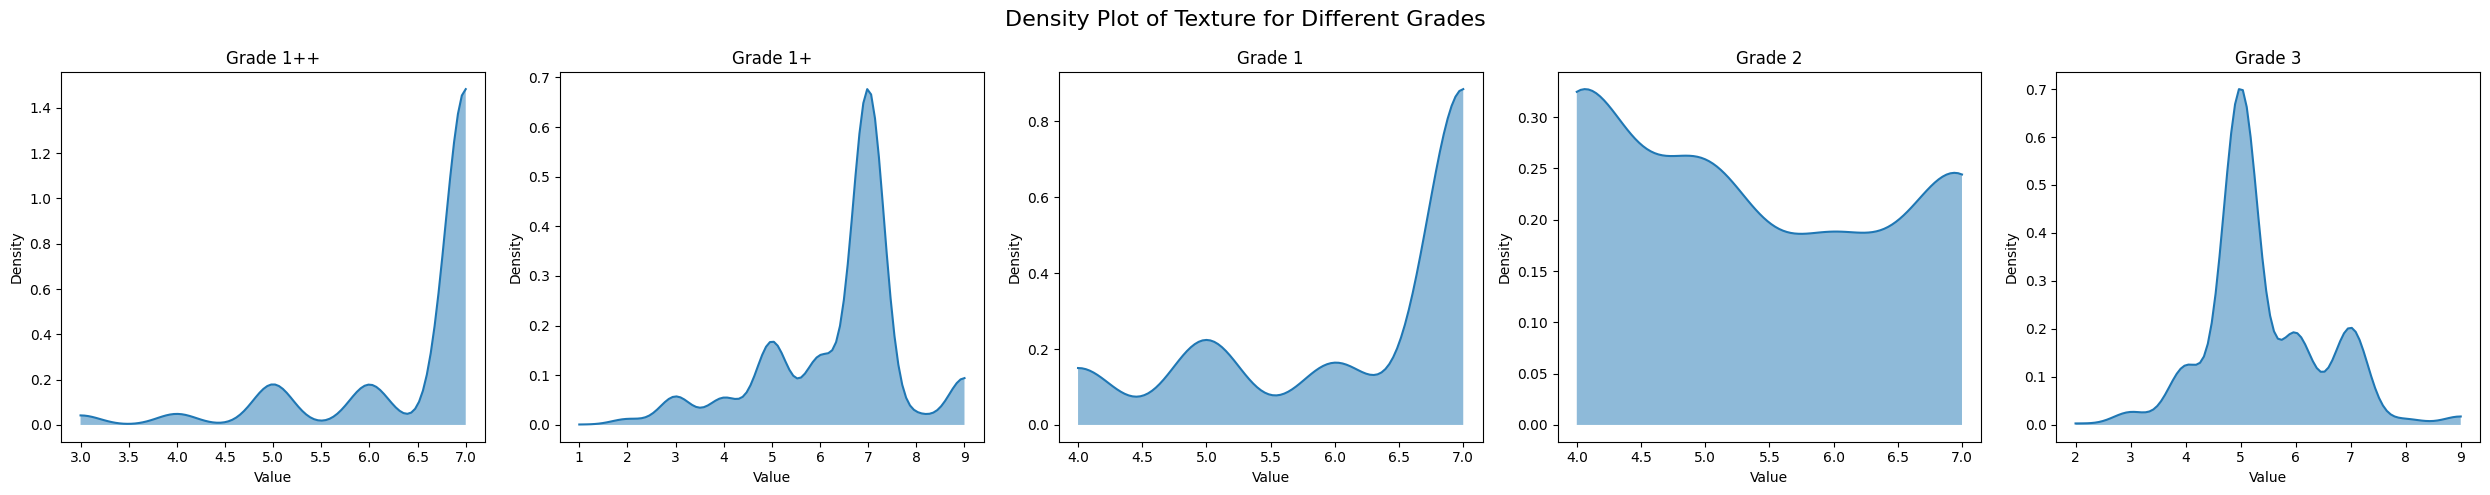

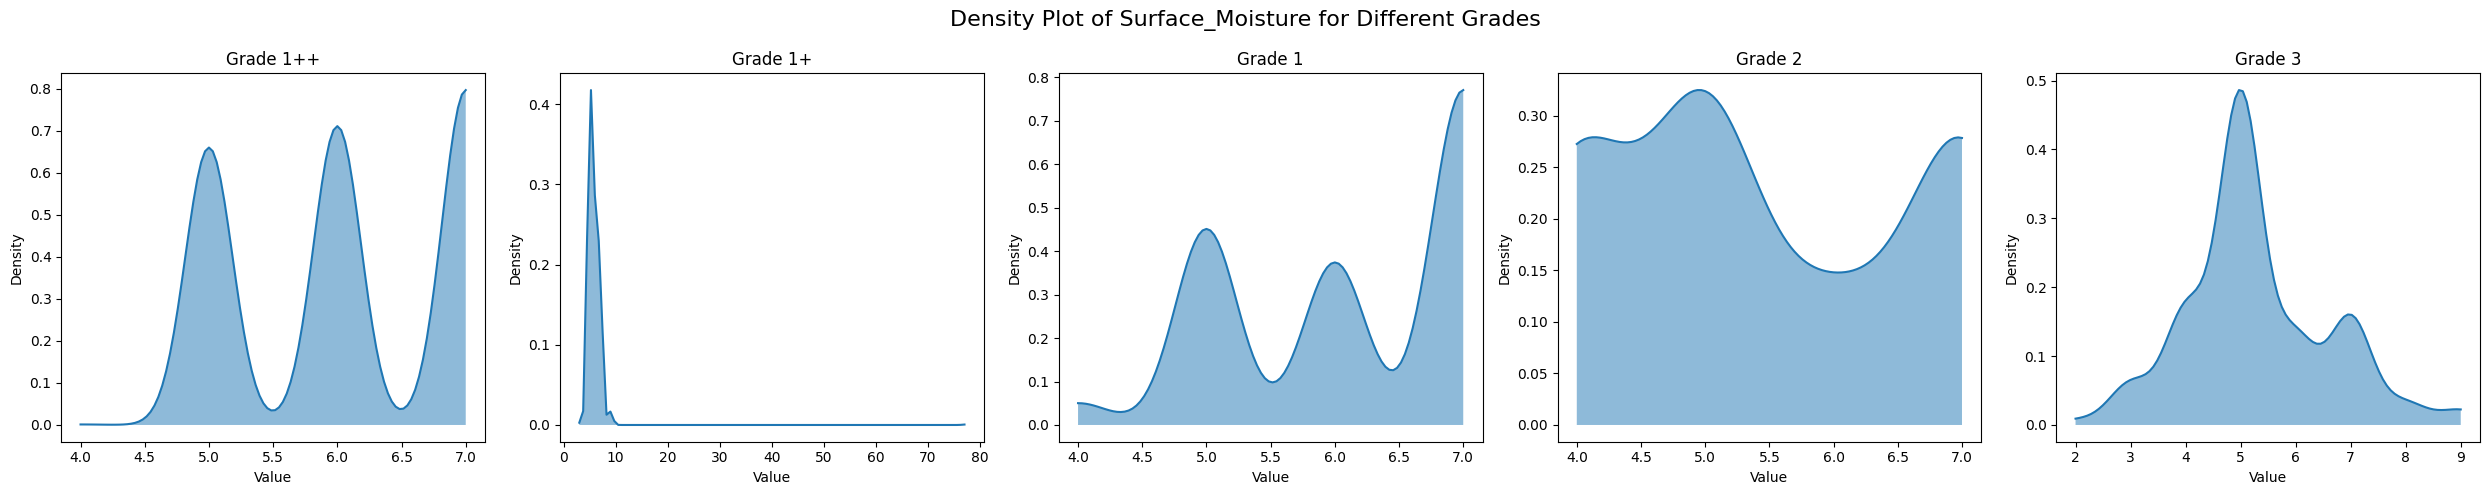

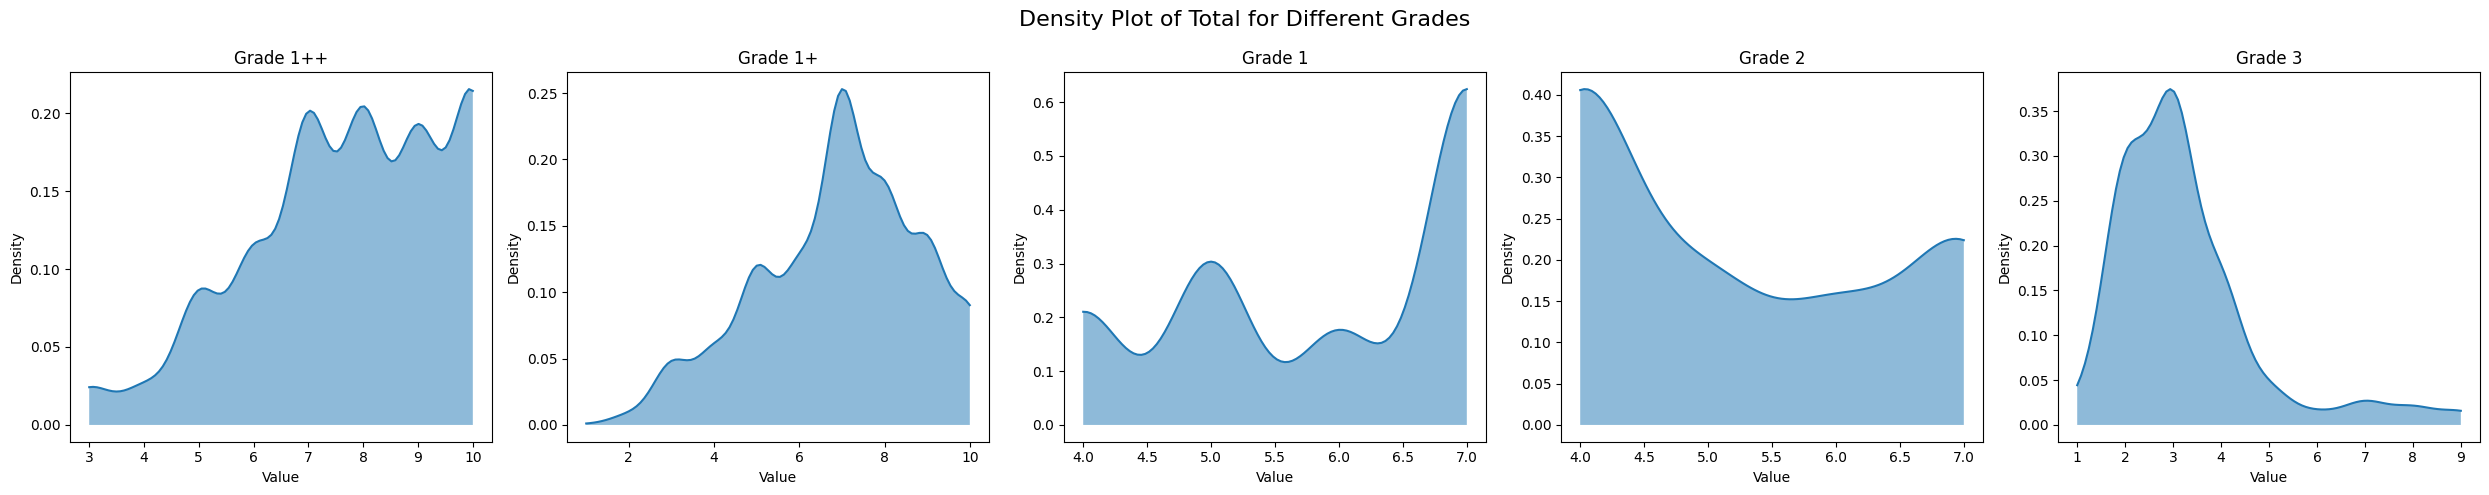

In [61]:
if not os.path.exists(save_path):
    os.makedirs(save_path)
drawKDE(df, criterion_column, target_columns, save_path=save_path)